### Vertical mode decomposition example
Haertel and Johnson, 1998, QJR.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Observatioanl data used: DYNAMO 
Get sounding data from [DYNAMO field campaign](http://johnson.atmos.colostate.edu/dynamo/products/array_averages/index.html) for decompostion of vetical modes.

In [64]:
os.chdir('/Users/willytsai/Desktop/')
data = xr.open_dataset('dynamo_nsa_v3a.nc')

In [75]:
T = data.T
theta = data.theta
Q1 = data.Q1
p = theta.level

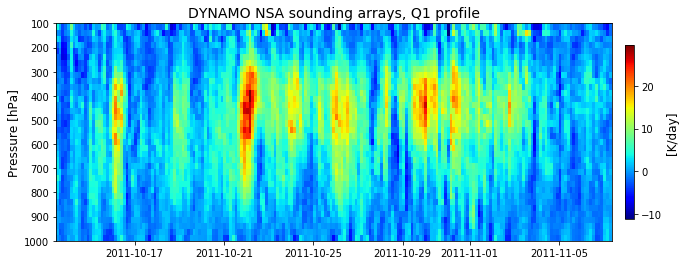

In [76]:
fig = plt.figure(figsize=(12,4))
Q1_sub = Q1[100:300]; theta_sub = theta[100:300]; T_sub = T[100:300]
time = Q1_sub.time
plt.pcolormesh(time.values,p,Q1_sub.T,cmap='jet')
plt.ylim([1000,100]);cbar = plt.colorbar(shrink=0.8,pad=0.02)
cbar.set_label('[K/day]',fontsize=12)
plt.title('DYNAMO NSA sounding arrays, Q1 profile',fontsize=14);plt.ylabel('Pressure [hPa]',fontsize=12)
plt.show()

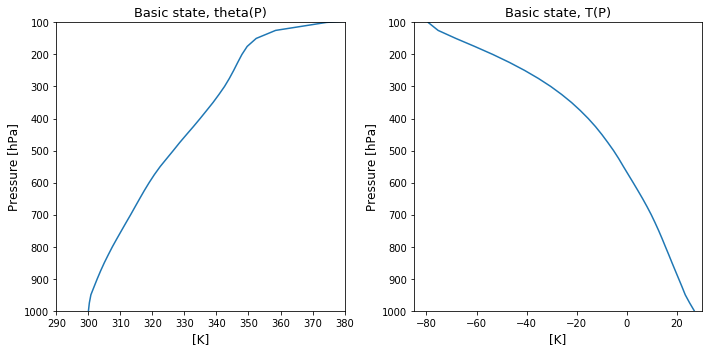

In [87]:
# get variables as the basic states 
fig,ax = plt.subplots(1,2,figsize=(10,5))
theta_bar = np.nanmean(theta_sub,axis=0)
ax[0].plot(theta_bar,p);
ax[0].set_xlim([290,380]);ax[0].set_ylim(([1000,100]))
ax[0].set_xlabel('[K]',fontsize=12);ax[0].set_ylabel('Pressure [hPa]',fontsize=12)
ax[0].set_title('Basic state, theta(P)',fontsize=13)

T_bar = np.nanmean(T_sub,axis=0)
ax[1].plot(T_bar,p);
ax[1].set_xlim([-85,30]);ax[1].set_ylim(([1000,100]))
ax[1].set_xlabel('[K]',fontsize=12);ax[1].set_ylabel('Pressure [hPa]',fontsize=12)
ax[1].set_title('Basic state, T(P)',fontsize=13)
plt.tight_layout();plt.show()

In [94]:
# boundary conditions and constant parameters
Pt = 100 # hPa
Pb = 1000 # hPa
R = 287.15 # gas constant, J/(kg K)
S = -T_bar*(np.gradient(theta_bar,p,axis=0)) # basic state stability
mu = p/(S*R)
dp = 25 # delta P, hpa

In [93]:
# solve eigenvalues and eigenfunctions based on the system of equations

for i in range(p):
    lamda = (mu[i-1]*h[i-1]-(mu[i-1]+mu[i])*h[i]+mu[i]*h[i+1])/dp**2



<xarray.DataArray 'level' (level: 40)>
array([-1.144218e+01,  9.605345e+02,  8.862330e+00,  4.840061e+00,
        3.682501e+00,  3.681364e+00,  3.584249e+00,  3.449877e+00,
        3.400441e+00,  3.386817e+00,  3.412904e+00,  3.611138e+00,
        3.899855e+00,  4.401573e+00,  5.201535e+00,  6.351055e+00,
        8.373661e+00,  1.328010e+01,  5.253794e+01, -1.803534e+01,
       -6.820544e+00, -4.023214e+00, -2.627860e+00, -1.829728e+00,
       -1.388141e+00, -1.098356e+00, -8.708268e-01, -7.170438e-01,
       -6.067551e-01, -5.294327e-01, -4.746305e-01, -4.077079e-01,
       -3.237356e-01, -2.203608e-01, -1.125928e-01, -4.313277e-02,
       -1.315676e-02, -3.783394e-03, -1.561524e-03, -9.339398e-04],
      dtype=float32)
Coordinates:
  * level    (level) float32 1025.0 1000.0 975.0 950.0 ... 125.0 100.0 75.0 50.0